<a href="https://colab.research.google.com/github/SebC750/Sebastian_Chalarca_Computer_Vision_Assignments/blob/main/Problem_Set_04_EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 04 - Edge Detections
**Professor:** Dr. Christoforos Christoforou


## Exercise 1
Edge detection is one of the most important operations in Computer Vision. In this exercise we will investigate how it can be performed and what information can be obtained from it.

One of the ways to detect edges is to compute image intensity gradients. They can be approximated by convolving image with Sobel filters. They consist of 2 $3 \times 3$ filters:

\begin{equation*}
S_x = \frac{1}{8}
\begin{bmatrix}
-1 & 0 & +1\\
-2 & 0 & +2\\
-1 & 0 & +1\\
\end{bmatrix}
\hspace{2cm}
S_y = \frac{1}{8}
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
+1 & +2 & +1\\
\end{bmatrix}
\end{equation*}

where $S_x$ computes the partial derivative of the image in the horizontal direction, while $S_y$ does it in the vertical direction.


**Exercise 1.1:**
* Load an image and convert it to gray scale (i.e. using the ```cv.cvtColor``` functions with `cv.COLOR_BGR2GRAY`) .

* Compute the image derivatives in x- and y-directions using Sobel filters. You can do that in a couple of ways.  One appoach is to use the function ```python cv2.Sobel()``` from openCV library.  A second appoach, you can define the sobel kernel manually (i.e. as a 2D array, one kernel for X and one kernel for Y) and use the  ```python cv.filter2D``` method to convolve the image with each of the two sobel kernel. For this task you are expected to compuer the derivatives in x- and y-directions using both approches.


* Visualize the image gradients. How can you explain the differences between the two results?

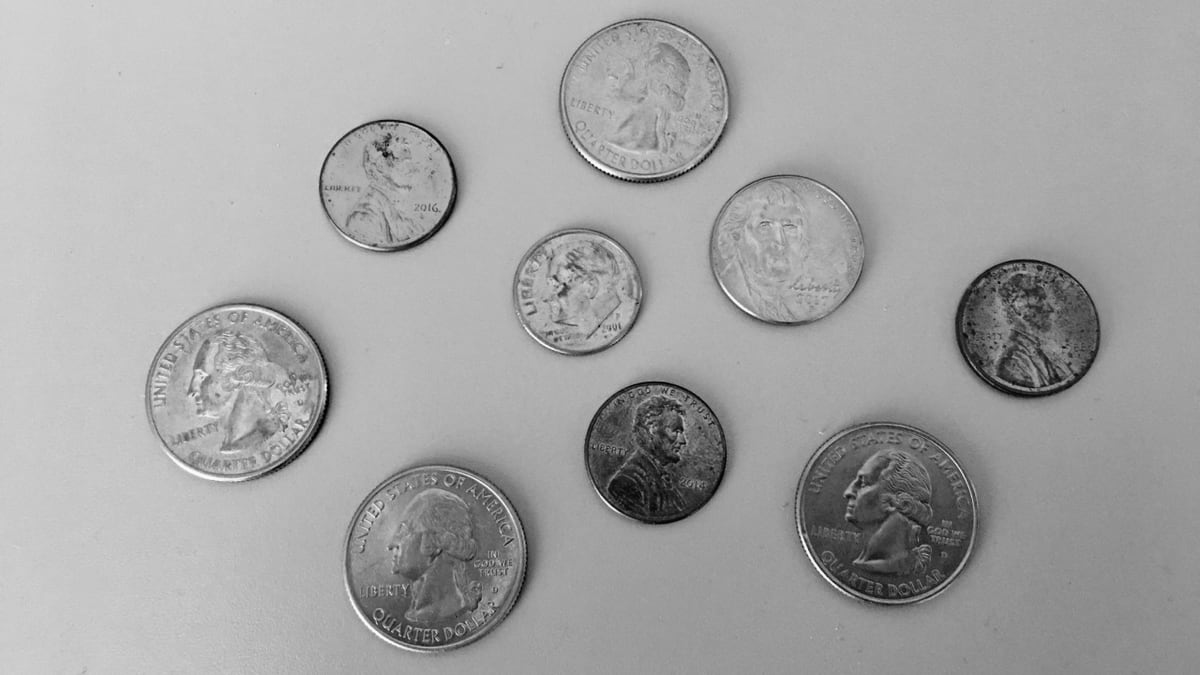

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import requests
from io import BytesIO
from PIL import Image, ImageFile
#
# Load an image from the following URL and convert it into gray scale.

url = 'https://gray-kalb-prod.cdn.arcpublishing.com/resizer/ZEfu9gsAgnX7p95ZECl6vgRIv8M=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/TFRH56MPINB3RJ23IDIAILPMOE.png'

# Issue a get request to image source
res = requests.get(url)

# img is a PIL.JpegImagePlugin.JpegImageFile object, since the input image is jpg.
img = Image.open(BytesIO(res.content))
img_data = np.asarray(img)
img_gray = cv.cvtColor(img_data, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

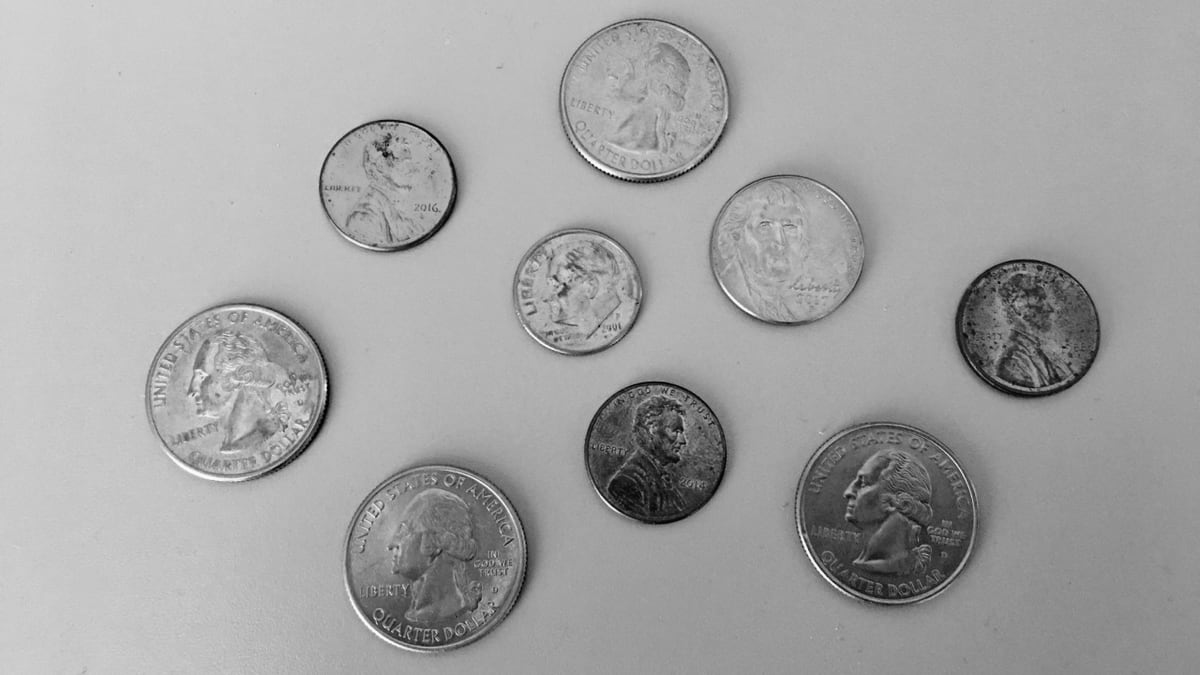

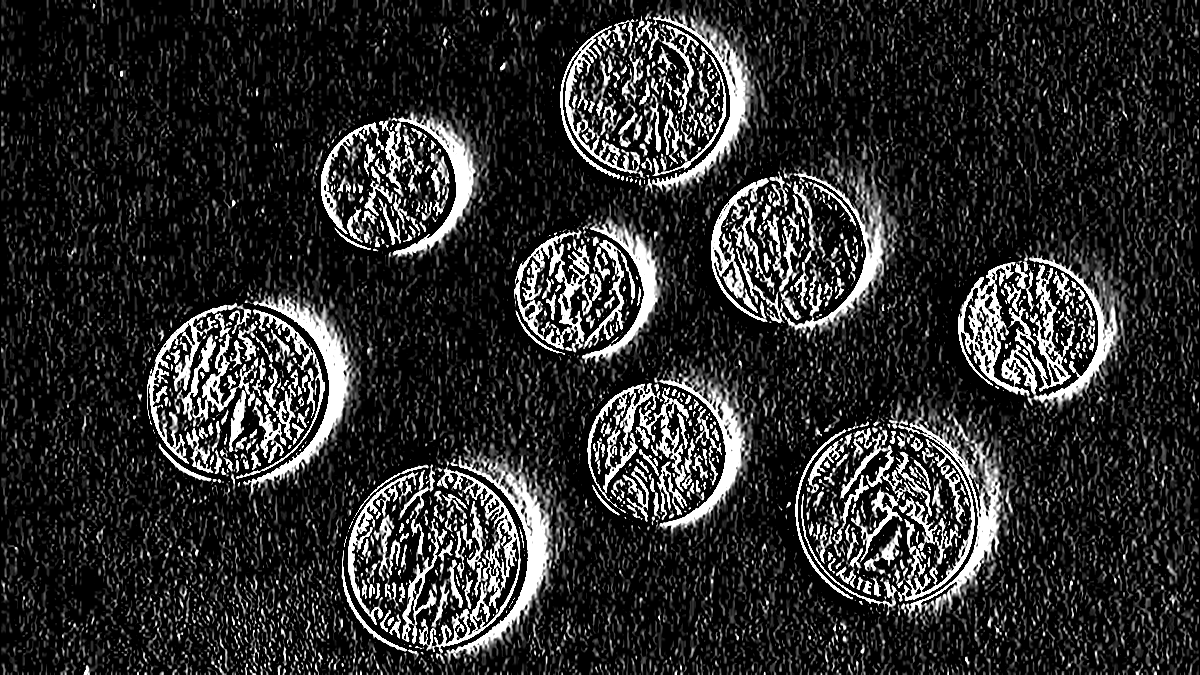

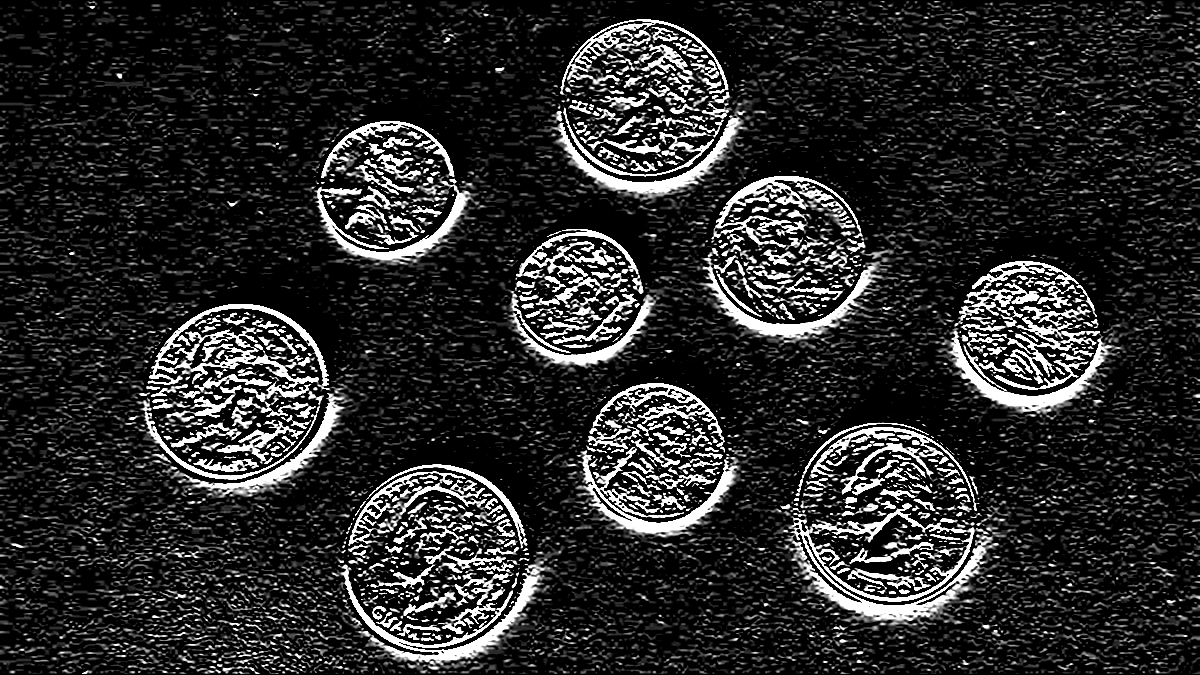

In [ ]:
#
# Calculate the image derivatives in x- and y-direction using the cv.Sobel method
#
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import requests
from io import BytesIO
from PIL import Image, ImageFile
#
# Load an image from the following URL and convert it into gray scale.

url = 'https://gray-kalb-prod.cdn.arcpublishing.com/resizer/ZEfu9gsAgnX7p95ZECl6vgRIv8M=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/TFRH56MPINB3RJ23IDIAILPMOE.png'

# Issue a get request to image source
res = requests.get(url)

# img is a PIL.JpegImagePlugin.JpegImageFile object, since the input image is jpg.
img = Image.open(BytesIO(res.content))
img_data = np.asarray(img)
img_gray = cv.cvtColor(img_data, cv.COLOR_BGR2GRAY)

sobelx = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=5)

sobely = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=5)


cv2_imshow(img_gray)
cv2_imshow(sobelx)
cv2_imshow(sobely)

plt.show()

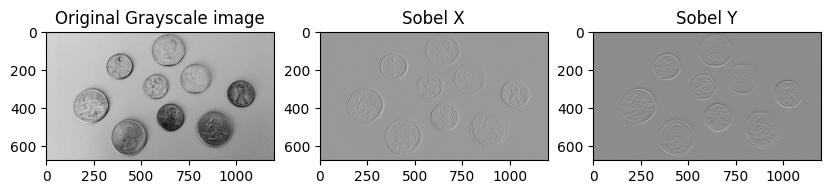

In [ ]:
#
# Visualize the image gradients calculated using the cv.Sobel approach.
#

plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Original Grayscale image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobelx, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Y')
plt.imshow(sobely, cmap='gray')

In [ ]:
#
# Calculate the image derivatives in x- and y-direction using manually designed sobel kernels and the cv.filter2D method
#

sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)

sobel_y_kernel = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]], dtype=np.float32)


sobelx = cv.filter2D(img_gray, cv.CV_64F, sobel_x_kernel)
sobely = cv.filter2D(img_gray, cv.CV_64F, sobel_y_kernel)
print(sobel_x_kernel)
print(sobel_y_kernel)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


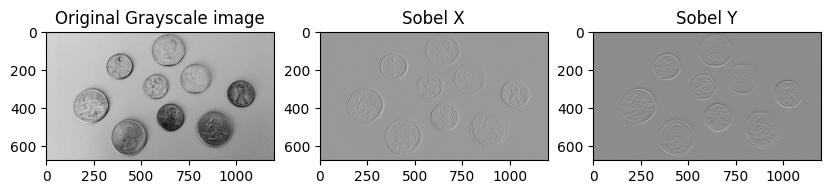

In [ ]:
#
# Visualize the image gradients calculated using the cv.filter2D approach.
#
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Original Grayscale image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobelx, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Y')
plt.imshow(sobely, cmap='gray')

Mathematically, the goal of the filters $S_x$ and $S_y$ is to approximate the derivatives of the image with respect to the horizontal and vertical directions respectively, such that
\begin{equation*}
\nabla I_x(x,y) = (I*S_x)[x,y]
\quad\mathrm{and}\quad
\nabla I_y(x,y) = (I*S_y)[x,y]
\end{equation*}

Therefore, the gradient of an image at each point is a 2D vector
\begin{equation*}
\nabla I =
\begin{bmatrix}
\nabla I_x\\
\nabla I_y
\end{bmatrix}
\end{equation*}

This vector can be computed for every pixel. Its magnitude and phase (i.e. angle)  can be computed as
\begin{equation*}
|| \nabla I || = \sqrt{(\nabla I_x)^2 + (\nabla I_y)^2} \\
\angle \nabla I = atan2(\nabla I_x, \nabla I_y)
\end{equation*}

$\it{Note:}$ we use atan2() instead of atan() to be able to determine the right quadrant of the phase.


**Exercise 1.2**
* Using the previously computed image gradients and the above formula compute the gradient magnitude and gradient phase. You can use the numpy functions `np.sqrt', `np.power` and `np.arctan2`.

* Visualize the **gradient magnitude** and **phase** images along with the **original image**. Plot all three images in a single row using the subplot function. Where does the gradient have high magnitude? How does the phase change along the coin border?



In [ ]:
#
#  Use this cell to calculate the magnitute and angle of the gradients calculated in exercise 1
#
gradient_magnitude = np.sqrt(np.square(sobelx) + np.square(sobely))

gradient_phase = np.arctan2(sobely, sobelx)

print(gradient_magnitude)
print(gradient_phase)

[[0.         0.         4.         ... 0.         8.         0.        ]
 [0.         0.         3.16227766 ... 2.         7.07106781 0.        ]
 [4.         3.16227766 2.82842712 ... 3.16227766 7.21110255 4.        ]
 ...
 [6.         7.21110255 1.41421356 ... 5.83095189 5.65685425 4.        ]
 [0.         4.         0.         ... 8.60232527 7.21110255 6.        ]
 [0.         4.         0.         ... 4.         4.         0.        ]]
[[ 0.          0.          0.         ...  0.          3.14159265
   0.        ]
 [ 0.          0.         -0.32175055 ... -1.57079633 -2.9996956
   0.        ]
 [-1.57079633 -1.24904577 -0.78539816 ... -1.89254688 -2.55359005
  -1.57079633]
 ...
 [-1.57079633 -2.55359005 -2.35619449 ...  0.5404195   0.78539816
   1.57079633]
 [ 0.          3.14159265  0.         ...  0.95054684  0.98279372
   1.57079633]
 [ 0.          3.14159265  0.         ...  0.          0.
   0.        ]]


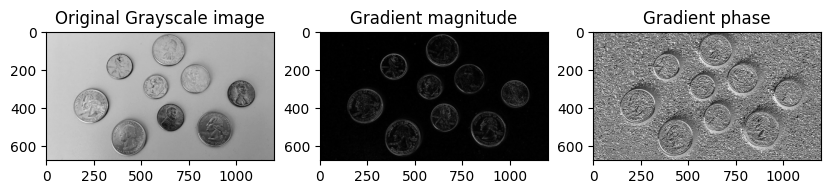

In [ ]:
#
# Visualize the gradient magnitute, phase and original image.
#
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Original Grayscale image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gradient magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Gradient phase')
plt.imshow(gradient_phase, cmap='gray')

**Respond to the questions** : Where does the gradient have high magnitude? How does the phase change along the coin border?


Your Response here: The gradient has a high magnitude (amount of change) on the borders of the coins as evidenced by the sharp contrast in the borders compared to the rest of the image. The gradient phase (the shift in saturation) changes slowly around the border by shifting from light to dark as you move around the border.

## Exercise 2 Laplacian of Gaussian opertator

An alternative way to detect image is to use the Laplacian operator. The opertor is calculated as the sum of the second partial derivatives along the x and y axis. To reduce the noise in the image, it is important that you first filter the image using a gaussian filter.  The operator is defined for an image f as:

$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

The operator is implemented in the openCV libary in the function `cv.Laplacian`

**Execise 2.1**
* Load an image, apply a graussina filter to reduce the noise (i.e. using the cv.GaussianBlur functions) and apply the laplacian operator.

* Visualize the origianl image and the Laplacian.

You can use the following tutorial as a [reference](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html).


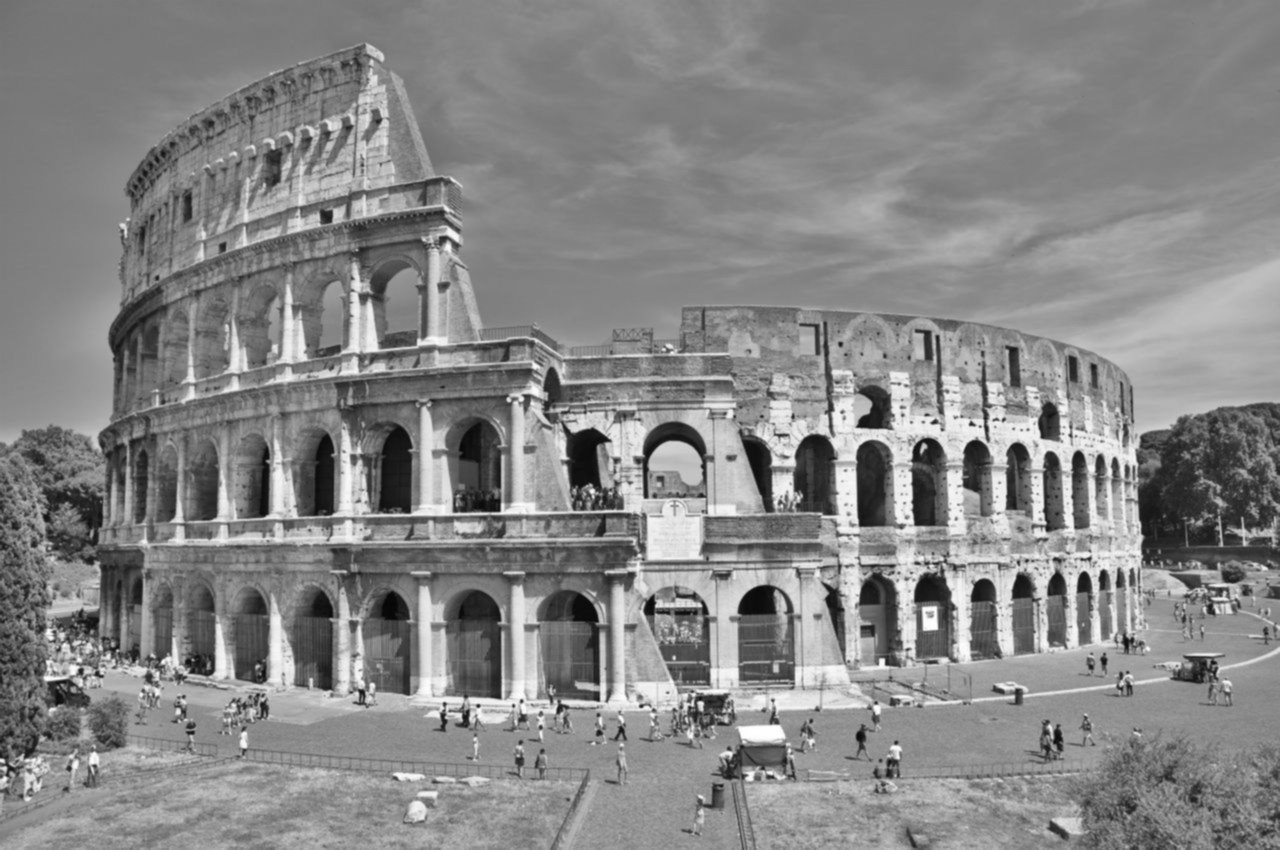

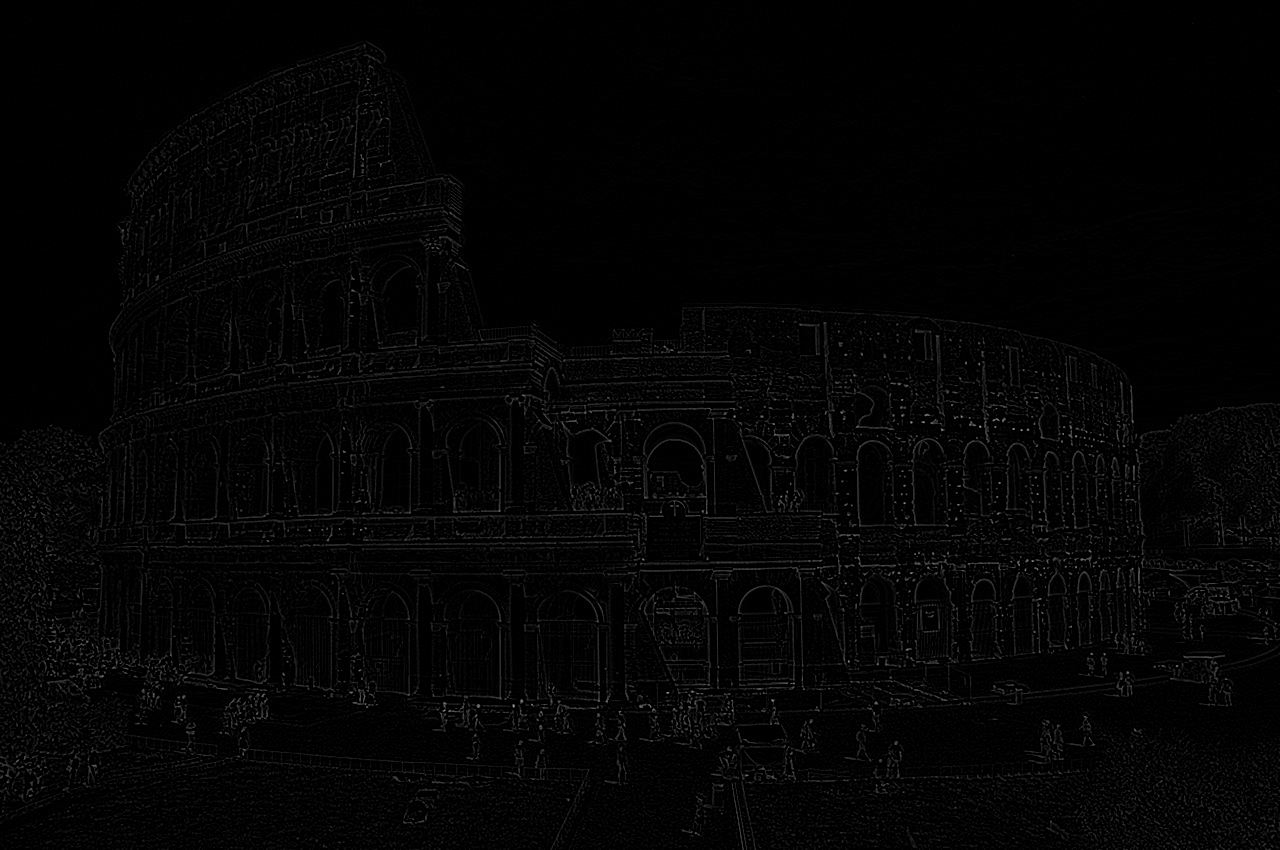

In [ ]:
#
# Load, filter, and generate the laplacian of the input image.
#
url = 'Il_Colosseo.jpg'

# Issue a get request to image source
img = cv.imread(url)

# img is a PIL.JpegImagePlugin.JpegImageFile object, since the input image is jpg.

img_gauss = cv.GaussianBlur(img,(3, 3),0)

img_gray = cv.cvtColor(img_gauss, cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

laplace = cv.Laplacian(img_gray, cv.CV_16S, 3)

cv2_imshow(laplace)

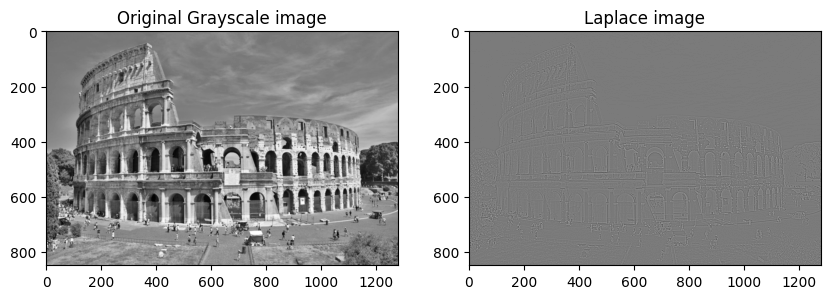

In [ ]:
#
# Visualize the original image the the Laplacian.
#

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Laplace image')
plt.imshow(laplace, cmap='gray')

Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.